## bRocket Logger Decoder
This script takes a binary file from the bRocket logger and decodes the values according to datatype, saves them in a .CSV and plots them

In [1]:
# NECESSARY INPUTS
fn = 'bR_0104131117_014.dat'
start_time = 0;
end_time = 10;

In [2]:
import numpy as np
import pandas as pd

dtype = np.dtype([
   ('time [s]', '<u4'),   # little-endian unsigned 32-bit integer
   ('dt [s]', '<u2'),   # little-endian unsigned 16-bit integer
   ('aX [m/s^2]', '<i2'),   # little-endian signed 16-bit integer
   ('aY [m/s^2]', '<i2'),   # little-endian signed 16-bit integer
   ('aZ [m/s^2]', '<i2'),   # little-endian signed 16-bit integer
   ('gX [°/s]', '<i2'),   # little-endian signed 16-bit integer
   ('gY [°/s]', '<i2'),   # little-endian signed 16-bit integer
   ('gZ [°/s]', '<i2'),   # little-endian signed 16-bit integer
   ('alt [m]', '<i2'),   # little-endian signed 16-bit integer
   ('temp [C]', '<i2'),    # little-endian signed 16-bit integer
   ('placeholder', '<i2')    # little-endian signed 16-bit integer
])

scaling_factors = {
 'time [s]': 1e-3,
 'dt [s]': 1e-6,
 'aX [m/s^2]': 1e-1,
 'aY [m/s^2]': 1e-1,
 'aZ [m/s^2]': 1e-1,
 'gX [°/s]': 1e-2,
 'gY [°/s]': 1e-2,
 'gZ [°/s]': 1e-2,
 'alt [m]': 1e-1,
 'temp [C]': 1e-1,
 'placeholder': 0
}

## READ IN DATA
with open(fn, 'rb') as f:  
    log = np.fromfile(f, dtype=dtype)

# CONVERT TO FLOATS
fields = log.dtype.names
new_dtype = np.dtype([(field, 'float64') for field in fields])
log_floats = np.empty_like(log, dtype=new_dtype)
for field in fields:
    log_floats[field] = log[field].astype('float64')
    
## MULTIPLY by factors
for field, scaling_factors in scaling_factors.items():
    log_floats[field] = log_floats[field] * scaling_factors

## CONVERT TO Pandas DATAFRAME
df_all = pd.DataFrame(log_floats)

# SELECT DATA Window
mask = (df_all['time [s]'] > start_time) & (df_all['time [s]'] < end_time)
df = df_all.loc[mask] # Cut Data Frame with mask

df.set_index('time [s]', inplace=True) # Set time as the index

In [3]:
## SAVE Dataframe to CSV file with precision 5
df.to_csv('log.csv', float_format='%.5f', index=True)

## Visualization

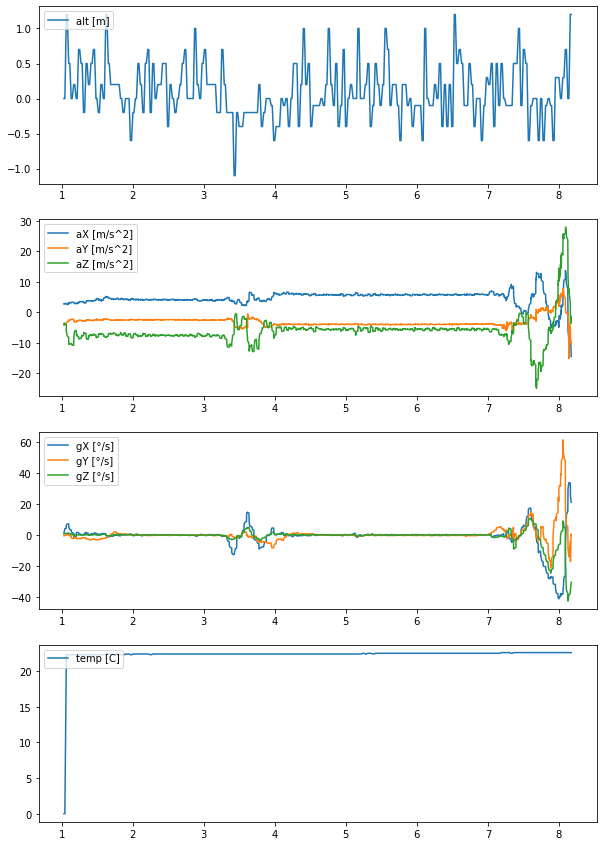

In [4]:
# Plot & Save figure
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, figsize=(10, 15)) # Adjust the size as needed

axs[0].plot(df['alt [m]'], label='alt [m]')
axs[1].plot(df['aX [m/s^2]'], label='aX [m/s^2]')
axs[1].plot(df['aY [m/s^2]'], label='aY [m/s^2]')
axs[1].plot(df['aZ [m/s^2]'], label='aZ [m/s^2]')
axs[2].plot(df['gX [°/s]'], label='gX [°/s]')
axs[2].plot(df['gY [°/s]'], label='gY [°/s]')
axs[2].plot(df['gZ [°/s]'], label='gZ [°/s]')
axs[3].plot(df['temp [C]'], label='temp [C]')

# Add legends
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')
axs[3].legend(loc='upper left')

# plt.tight_layout()
plt.show()
fig.savefig("log.png")

## Debug

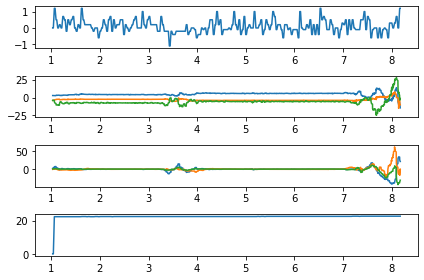

In [5]:
fig, axs = plt.subplots(4)
axs[0].plot(df['alt [m]'])
axs[1].plot(df[['aX [m/s^2]','aY [m/s^2]', 'aZ [m/s^2]']])
axs[2].plot(df[['gX [°/s]','gY [°/s]', 'gZ [°/s]']])
axs[3].plot(df['temp [C]']) # Replace 'another_column' with the actual column name

plt.tight_layout()
plt.show()

In [6]:
# Set the precision to 15 (you can increase this number for even higher precision)
np.set_printoptions(precision=4)
log_floats

array([(1.031, 0.048 ,   2.8,  -4.1, -4.1,  1.41, -0.41,   0.78, 0. ,  0. , 0.),
       (1.032, 0.0017,   2.8,  -4.1, -3.8,  1.75, -0.33,   0.83, 0. ,  0. , 0.),
       (1.034, 0.0017,   2.7,  -4.1, -3.7,  2.08, -0.28,   0.9 , 0. ,  0. , 0.),
       ...,
       (8.17 , 0.0017, -12.1,  -9.7, -3. , 22.08,  0.  , -31.91, 1.2, 22.6, 0.),
       (8.172, 0.0017, -13.7,  -9.9, -1.7, 21.56,  0.75, -31.12, 1.2, 22.6, 0.),
       (8.173, 0.0017, -14.5, -10.2, -1.4, 21.12,  0.2 , -30.19, 1.2, 22.6, 0.)],
      dtype=[('time [s]', '<f8'), ('dt [s]', '<f8'), ('aX [m/s^2]', '<f8'), ('aY [m/s^2]', '<f8'), ('aZ [m/s^2]', '<f8'), ('gX [°/s]', '<f8'), ('gY [°/s]', '<f8'), ('gZ [°/s]', '<f8'), ('alt [m]', '<f8'), ('temp [C]', '<f8'), ('placeholder', '<f8')])

In [7]:
# log['gY'] = log['gY'].astype(np.float64) # Works